In [17]:
import pandas as pd

In [18]:
train_df = pd.read_csv('train_original.csv')

In [40]:
enter_counts= train_df['congestion_enter_rating'].value_counts().reset_index()

enter_counts.columns = ['congestion_enter_rating','count']

enter_counts

,congestion_enter_rating,count
0,free flowing,10056
1,moderate delay,2328
2,light delay,1919
3,heavy delay,1773


In [20]:
import matplotlib.pyplot as plt

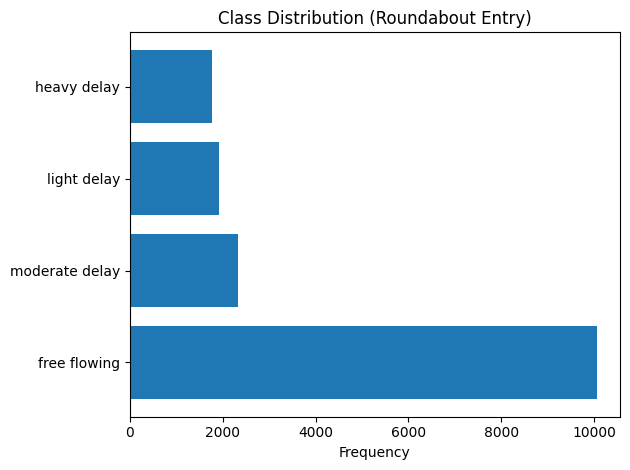

In [44]:
plt.barh(enter_counts["congestion_enter_rating"], enter_counts["count"])
plt.xlabel("Frequency")
plt.title("Class Distribution (Roundabout Entry)")
plt.tight_layout()
plt.savefig("plots/class_dist_entry.png")
plt.show()

import 

In [45]:
exit_counts = train_df['congestion_exit_rating'].value_counts().reset_index()

exit_counts.columns = ['congestion_exit_rating','count']

exit_counts

,congestion_exit_rating,count
0,free flowing,15353
1,moderate delay,283
2,light delay,241
3,heavy delay,199


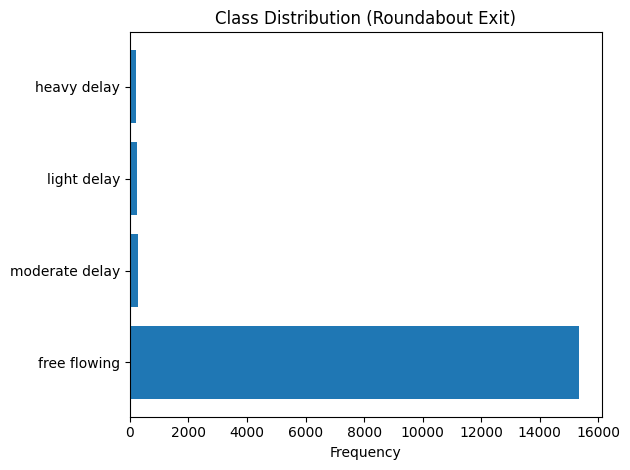

In [46]:
plt.barh(exit_counts["congestion_exit_rating"], exit_counts["count"])
plt.xlabel("Frequency")
plt.title("Class Distribution (Roundabout Exit)")
plt.tight_layout()
plt.savefig("plots/class_dist_exit.png")
plt.show()

In [22]:
train_df.shape

(16076, 14)

In [23]:
(199+283+241)/16076

0.044973874098034335

In [24]:
predictions_df = train_df[['congestion_enter_rating','congestion_exit_rating']]

predictions_df.shape

(16076, 2)

In [25]:
choices = list(train_df['congestion_enter_rating'].unique())



In [26]:
import numpy as np

predictions_df['enter_predict'] = np.random.choice(choices, size=len(predictions_df))
predictions_df['exit_predict'] = np.random.choice(choices, size=len(predictions_df))

/var/folders/kp/522tkn6j1bs8979pd5kfh_yr0000gn/T/ipykernel_5771/2194459948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_df['enter_predict'] = np.random.choice(choices, size=len(predictions_df))
/var/folders/kp/522tkn6j1bs8979pd5kfh_yr0000gn/T/ipykernel_5771/2194459948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_df['exit_predict'] = np.random.choice(choices, size=len(predictions_df))


In [27]:
predictions_df.shape

(16076, 4)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

enter_true = predictions_df['congestion_enter_rating']
enter_pred = predictions_df['enter_predict']

exit_true = predictions_df['congestion_exit_rating']
exit_pred = predictions_df['exit_predict']

In [29]:

enter_accuracy  = accuracy_score(enter_true, enter_pred)
enter_precision = precision_score(enter_true, enter_pred, average='macro')  
enter_recall    = recall_score(enter_true, enter_pred, average='macro')
enter_f1        = f1_score(enter_true, enter_pred, average='macro')

print("Roundabout Entering")
print("Accuracy :", enter_accuracy)
print("Precision:", enter_precision)
print("Recall   :", enter_recall)
print("F1 Score :", enter_f1)

Roundabout Entering
Accuracy : 0.25236377208260763
Precision: 0.2500450714733331
Recall   : 0.25159772478693665
F1 Score : 0.21543903162311087


In [30]:

exit_accuracy  = accuracy_score(exit_true, exit_pred)
exit_precision = precision_score(exit_true, exit_pred, average='macro')  
exit_recall    = recall_score(exit_true, exit_pred, average='macro')  
exit_f1        = f1_score(exit_true, exit_pred, average='macro')  

print("Roundabout Exit")
print("Accuracy :", exit_accuracy)
print("Precision:", exit_precision)
print("Recall   :", exit_recall)
print("F1 Score :", exit_f1)

Roundabout Exit
Accuracy : 0.2576511570042299
Precision: 0.25026968487410317
Recall   : 0.24790595303982577
F1 Score : 0.12279665456250878
